In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.DataFrame(pd.read_csv("FinalSample.csv"))

In [3]:
data.shape

(10000, 23)

In [4]:
data.head()

,RecipeId,Name,Images,RecipeCategory,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,...,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,Review_Class,IngredientsCount,minimum_rating,maximum_rating,mean_of_rating
0,78011,Rosemary Roasted Sweet Potatoes,"""https://img.sndimg.com/food/image/upload/w_55...",Yam/Sweet Potato,7.0,244.8,15.4,9.7,40.6,368.1,...,1.2,4.0,35,10,45,average,6,5.0,5.0,5.000000
1,92592,Mini-Ham Puffs,character(0),< 60 Mins,12.0,46.4,1.6,0.7,16.1,99.2,...,2.5,24.0,13,20,33,average,6,0.0,5.0,4.500000
2,155037,Caribbean Rice in a Rice Cooker,"c(""https://img.sndimg.com/food/image/upload/w_...",One Dish Meal,10.0,292.4,5.3,4.2,0.0,213.8,...,6.0,4.0,25,15,40,average,14,0.0,5.0,4.222222
3,143396,Blue Ribbon Peanut Butter Cookies,"""https://img.sndimg.com/food/image/upload/w_55...",Dessert,6.0,86.8,4.8,1.6,7.5,67.1,...,1.5,36.0,10,20,30,average,8,4.0,5.0,4.666667
4,133358,Sun-Dried Tomato Tortellini Salad,"c(""https://img.sndimg.com/food/image/upload/w_...",Vegetable,12.0,385.7,18.7,4.1,24.0,1104.0,...,12.7,4.0,0,15,15,average,10,0.0,5.0,4.583333


In [5]:
data = data.drop(['RecipeId', 'Name', 'Images', "RecipeCategory", 'minimum_rating', 'maximum_rating', "Review_Class"], axis=1)

In [6]:
data.head()

,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,IngredientsCount,mean_of_rating
0,7.0,244.8,15.4,9.7,40.6,368.1,26.8,2.1,16.0,1.2,4.0,35,10,45,6,5.000000
1,12.0,46.4,1.6,0.7,16.1,99.2,5.4,0.4,0.6,2.5,24.0,13,20,33,6,4.500000
2,10.0,292.4,5.3,4.2,0.0,213.8,55.9,4.1,9.6,6.0,4.0,25,15,40,14,4.222222
3,6.0,86.8,4.8,1.6,7.5,67.1,9.8,0.3,6.1,1.5,36.0,10,20,30,8,4.666667
4,12.0,385.7,18.7,4.1,24.0,1104.0,46.2,5.4,12.7,12.7,4.0,0,15,15,10,4.583333


In [10]:
data.shape
corr = data.corr()

In [12]:
corr

,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,IngredientsCount,mean_of_rating
ReviewCount,1.000000,0.023865,0.016945,0.025060,0.031898,0.029860,0.022050,-0.028505,0.036963,0.020234,0.007085,0.012673,0.004948,0.013610,0.023170,-0.018409
Calories,0.023865,1.000000,0.842840,0.722385,0.611837,0.528590,0.586319,0.321540,0.143613,0.680355,-0.073373,0.099434,0.072250,0.119889,0.266294,0.006813
FatContent,0.016945,0.842840,1.000000,0.856114,0.594205,0.429515,0.193043,0.133212,0.000267,0.524044,-0.051829,0.056688,0.062309,0.077206,0.204987,0.032786
SaturatedFatContent,0.025060,0.722385,0.856114,1.000000,0.589304,0.351292,0.195414,0.056950,0.038388,0.406673,-0.038256,0.043487,0.047546,0.058944,0.152633,0.024590
CholesterolContent,0.031898,0.611837,0.594205,0.589304,1.000000,0.401966,0.042990,-0.079528,-0.068867,0.722303,-0.051773,0.101354,0.058469,0.116141,0.185992,-0.022674
SodiumContent,0.029860,0.528590,0.429515,0.351292,0.401966,1.000000,0.232583,0.224093,-0.123887,0.535361,-0.062216,0.131654,0.051650,0.140878,0.247514,-0.014641
CarbohydrateContent,0.022050,0.586319,0.193043,0.195414,0.042990,0.232583,1.000000,0.512881,0.470760,0.087762,-0.036343,0.027053,0.047612,0.043921,0.204807,-0.024303
FiberContent,-0.028505,0.321540,0.133212,0.056950,-0.079528,0.224093,0.512881,1.000000,0.023593,0.120097,-0.058818,0.082886,0.015268,0.081304,0.257024,0.025847
SugarContent,0.036963,0.143613,0.000267,0.038388,-0.068867,-0.123887,0.470760,0.023593,1.000000,-0.190449,0.009931,0.000492,0.018150,0.007953,0.051073,0.017702
ProteinContent,0.020234,0.680355,0.524044,0.406673,0.722303,0.535361,0.087762,0.120097,-0.190449,1.000000,-0.071694,0.171640,0.050505,0.176410,0.207013,-0.011958


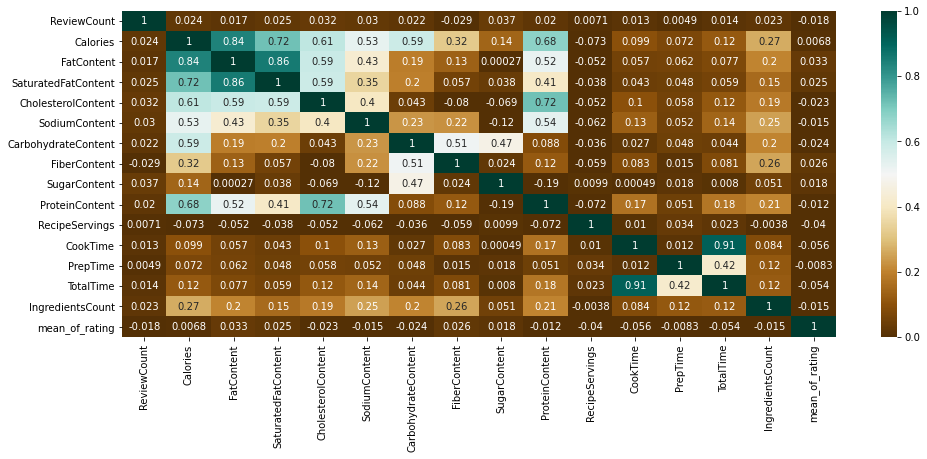

In [21]:
plt.figure(figsize=(16, 6))
ax = sns.heatmap(data.corr(), vmin=0, vmax=1, annot=True, cmap='BrBG')